In [19]:
#Лаба по блокам, объяснение к каждому блоку, а не заданию
#1
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']
y
0    36548
1     4640
Name: count, dtype: int64
percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


C:\Users\MSI\AppData\Local\Temp\ipykernel_7088\3767397903.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='hls')


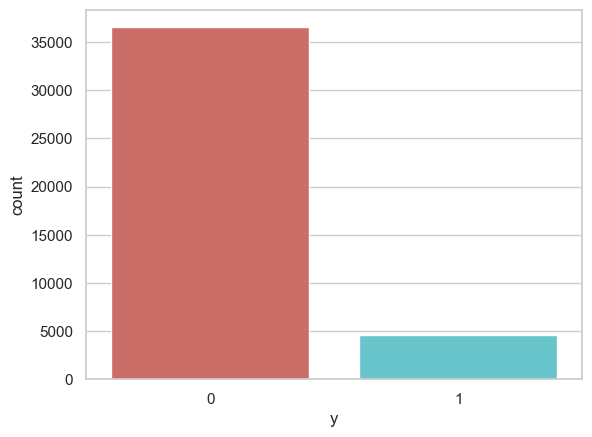

In [5]:
#2
# Загрузка данных
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv', header=0)
data = data.dropna()

# Объединение категорий переменной 'education'
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

# Визуализация основных статистических характеристик
print(data.shape)
print(list(data.columns))
print(data['education'].unique())

#автоматизированное исследование данных датасета. 
#выясним, сколько данных соотнесено с прогнозируемой переменной y
print(data['y'].value_counts())
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)
sns.countplot(x='y', data=data, palette='hls')
plt.show()

Text(0.5, 1.0, 'Частота покупки депозита от должности')

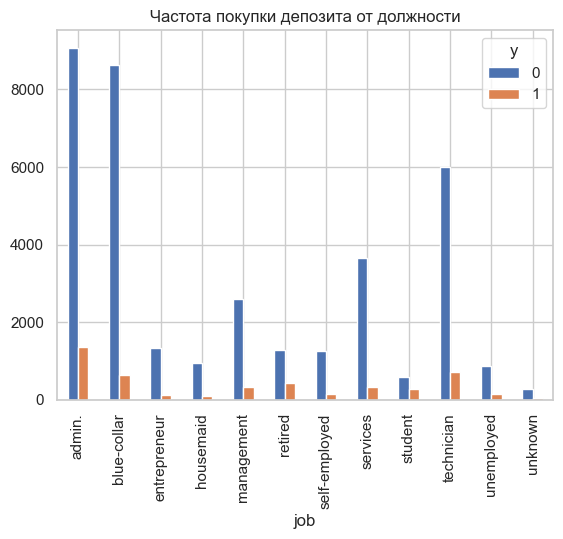

In [6]:
#3
# Визуализация отношения категориальных признаков к целевой переменной
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Частота покупки депозита от должности')


Text(0.5, 1.0, 'Частота покупки депозита от семейного положения клиента')

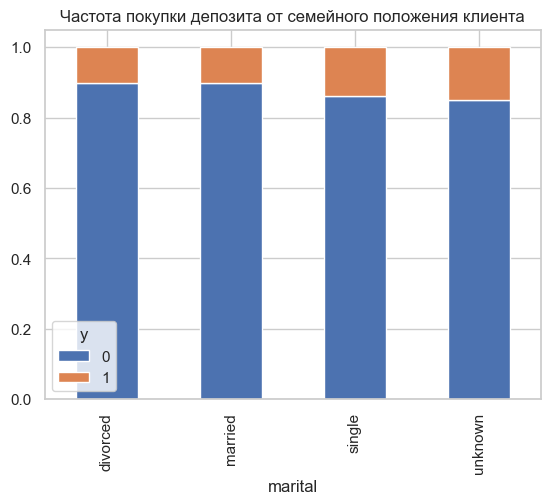

In [7]:
#4
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Частота покупки депозита от семейного положения клиента')


Text(0.5, 1.0, 'Частота покупки депозита от образования клиента')

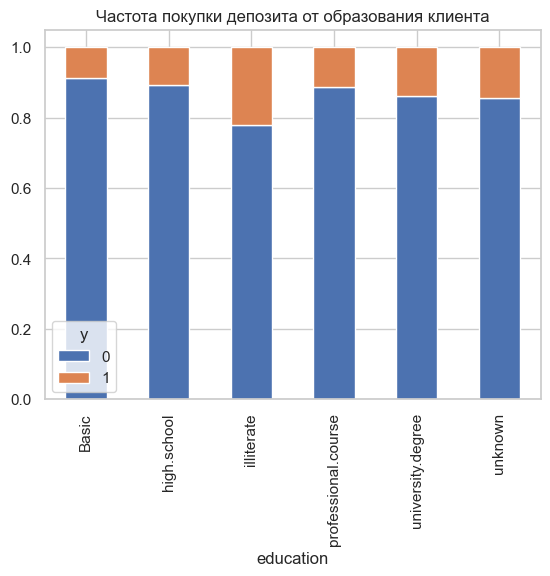

In [8]:
#5
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Частота покупки депозита от образования клиента')


Text(0.5, 1.0, 'Частота покупки депозита от дня недели')

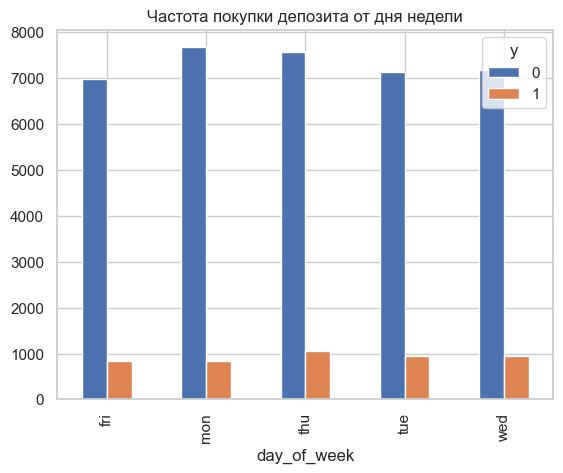

In [9]:
#6
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Частота покупки депозита от дня недели')


Text(0.5, 1.0, 'Частота покупки депозита от месяца покупки')

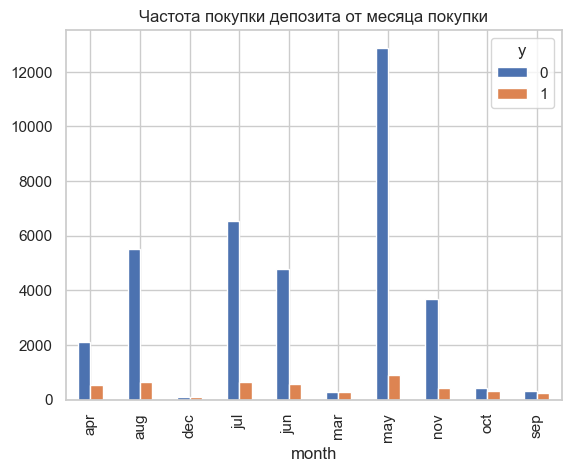

In [10]:
#7
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Частота покупки депозита от месяца покупки')


Text(0.5, 1.0, 'Частота покупки депозита от возраста клиента')

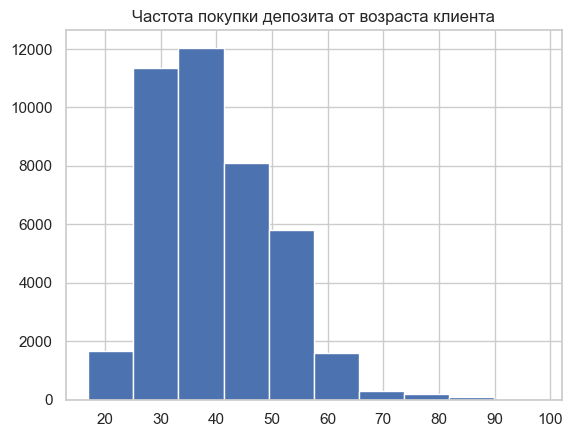

In [11]:
#8
data.age.hist()
plt.title('Частота покупки депозита от возраста клиента')

Text(0.5, 1.0, 'Частота покупки депозита от итогов предыдущей маркетинговой кампании')

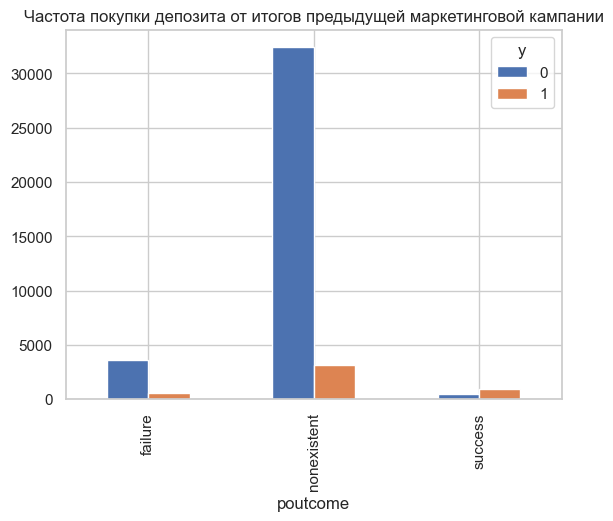

In [12]:
#9
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Частота покупки депозита от итогов предыдущей маркетинговой кампании')


In [13]:
#10
# Преобразование категориальных признаков в фиктивные переменные
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

# Итоговые переменные
data_final=data[to_keep]
print(data_final.columns.values)


['age' 'duration' 'campaign' 'pdays' 'previous' 'emp_var_rate'
 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed' 'y'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'marital_unknown'
 'education_Basic' 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'default_no' 'default_unknown' 'default_yes'
 'housing_no' 'housing_unknown' 'housing_yes' 'loan_no' 'loan_unknown'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'month_apr' 'month_aug'
 'month_dec' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'day_of_week_fri' 'day_of_week_mon'
 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed' 'poutcome_failure'
 'poutcome_nonexistent' 'poutcome_success']


In [14]:
#11
# Разделение данных на обучающий и тестовый наборы
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

# Применение метода SMOTE для балансировки классов
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# Применение рекурсивного исключения признаков (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20, step=0.9999)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
N = rfe.n_features_
print("Число отобранных признаков: ", N)


c:\Users\MSI\Desktop\институт\2курс\4семестр\АВБИ\Data_Science\lb_3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MSI\Desktop\институт\2курс\4семестр\АВБИ\Data_Science\lb_3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opti

Число отобранных признаков:  20


In [15]:
#12
dfN = pd.DataFrame(rfe.support_, index=X.columns, columns=['Rank']).sort_values(by='Rank', ascending=False)
sign_tokens = dfN.head(N).index.tolist()
print("Значимые признаки: ", sign_tokens)


Значимые признаки:  ['education_university.degree', 'day_of_week_tue', 'education_high.school', 'contact_cellular', 'month_mar', 'month_may', 'housing_no', 'loan_no', 'day_of_week_mon', 'marital_single', 'day_of_week_thu', 'job_admin.', 'day_of_week_wed', 'euribor3m', 'default_no', 'cons_price_idx', 'emp_var_rate', 'previous', 'housing_yes', 'campaign']


In [20]:
#13
# Построение модели логистической регрессии с использованием библиотеки statsmodels
import statsmodels.api as sm
X=os_data_X[sign_tokens].replace(False,0).replace(True,1)
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


C:\Users\MSI\AppData\Local\Temp\ipykernel_7088\2168920872.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=os_data_X[sign_tokens].replace(False,0).replace(True,1)


Optimization terminated successfully.
         Current function value: 0.327889
         Iterations 9
                               Results: Logit
Model:                   Logit               Method:              MLE       
Dependent Variable:      y                   Pseudo R-squared:    0.527     
Date:                    2024-05-09 11:13    AIC:                 33572.5674
No. Observations:        51134               BIC:                 33749.4115
Df Model:                19                  Log-Likelihood:      -16766.   
Df Residuals:            51114               LL-Null:             -35443.   
Converged:               1.0000              LLR p-value:         0.0000    
No. Iterations:          9.0000              Scale:               1.0000    
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
educa

In [ ]:
#14
# Оценка точности модели на тестовом наборе данных
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Точность классификатора на тестовом наборе данных: {:.2f}'.format(logreg.score(X_test, y_test)))

Точность классификатора на тестовом наборе данных: 0.83


In [ ]:
#15
# Построение матрицы ошибок
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6580 1086]
 [1560 6115]]


In [ ]:
#16
# Отчет о классификации
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      7666
           1       0.85      0.80      0.82      7675

    accuracy                           0.83     15341
   macro avg       0.83      0.83      0.83     15341
weighted avg       0.83      0.83      0.83     15341



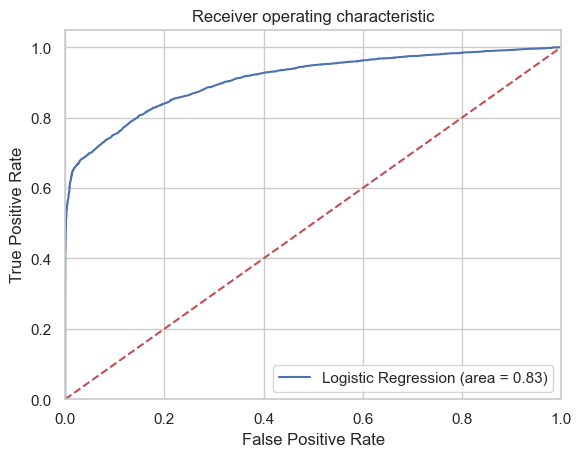

In [ ]:
#17
# Построение ROC-кривой
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Загрузка данных
data = pd.read_csv('updated_data_3.csv')
data = data.drop('top_10', axis=1)

# Преобразование столбца 'artists' в категориальный признак
data['artists'] = data['artists'].apply(lambda x: x.replace("[", "").replace("]", "").replace("'", ""))

# Выбор переменных для обучения модели
variables = ['popularity']

# Разделение данных на обучающую и тестовую выборки
X = data[variables]
y = data['top_10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-кривая (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Доля истинноположительных результатов')
plt.title('Операционные характеристики принятия решений')
plt.legend(loc="lower right")
plt.show()

# Оценка модели
confusion_mat = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(confusion_mat)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок')
plt.show()

KeyError: 'top_10'

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

# Загрузка данных
data = pd.read_csv('updated_data_3.csv')

# Преобразование столбца 'artists' в категориальный признак
data['artists'] = data['artists'].apply(lambda x: x.replace("[", "").replace("]", "").replace("'", ""))

# Преобразование целевой переменной в бинарную
data['popularity_binary'] = (data['popularity'] > data['popularity'].median()).astype(int)

# Выбор переменных для обучения модели
variables = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

# Разделение данных на обучающую и тестовую выборки
X = data[variables]
y = data['popularity_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Выбираем только вероятности для класса 1

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Указываем multi_class='ovr' для бинарной классификации


# Оценка модели
confusion_mat = confusion_matrix(y_test, y_pred_proba > 0.5)
print("Матрица ошибок:")
print(confusion_mat)

print(f"ROC-AUC: {roc_auc}")


Матрица ошибок:
[[ 862  943]
 [ 595 1154]]
ROC-AUC: 0.5871614804819216


c:\Users\MSI\Desktop\институт\2курс\4семестр\АВБИ\Data_Science\lb_3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

# Загрузка данных
data = pd.read_csv('updated_data_3.csv')

# Преобразование столбца 'artists' в категориальный признак
data['artists'] = data['artists'].apply(lambda x: x.replace("[", "").replace("]", "").replace("'", ""))

# Выбор переменных для обучения модели
variables = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

# Преобразование целевой переменной в бинарную форму
data['popular'] = (data['popularity'] > 80).astype(int)

# Разделение данных на обучающую и тестовую выборки
X = data[variables]
y = data['popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Выбираем только вероятности для класса 1

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Оценка модели
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(confusion_mat)

print(f"ROC-AUC: {roc_auc}")


Матрица ошибок:
[[3416    0]
 [ 138    0]]
ROC-AUC: 0.6090011200488749


c:\Users\MSI\Desktop\институт\2курс\4семестр\АВБИ\Data_Science\lb_3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\MSI\Desktop\институт\2курс\4семестр\АВБИ\Data_Science\lb_3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


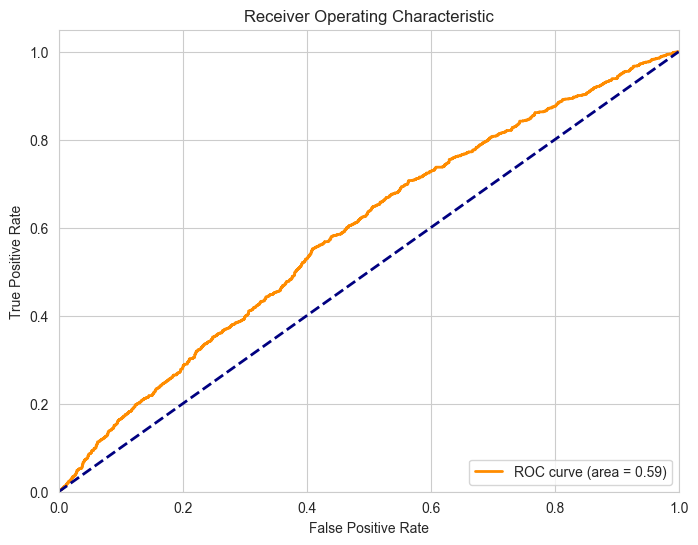

Матрица ошибок:
[[ 862  943]
 [ 595 1154]]
ROC-AUC: 0.5871614804819216


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Загрузка данных
data = pd.read_csv('updated_data_3.csv')

# Преобразование столбца 'artists' в категориальный признак
data['artists'] = data['artists'].apply(lambda x: x.replace("[", "").replace("]", "").replace("'", ""))

# Преобразование целевой переменной в бинарную
data['popularity_binary'] = (data['popularity'] > data['popularity'].median()).astype(int)

# Выбор переменных для обучения модели
variables = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

# Разделение данных на обучающую и тестовую выборки
X = data[variables]
y = data['popularity_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Выбираем только вероятности для класса 1

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Визуализация ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Оценка модели
confusion_mat = confusion_matrix(y_test, y_pred_proba > 0.5)
print("Матрица ошибок:")
print(confusion_mat)

print(f"ROC-AUC: {roc_auc}")